In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#for binary classification! no softmax here

def forward(X,W1,b1,W2,b2):
    #assume we will use tanh() on hidden
    #and softmax on output
    #2 sigmoids in a row
    Z = 1/(1+np.exp(-(X.dot(W1)+b1)))
    activation = Z.dot(W2) + b2
    Y = 1/(1+np.exp(-activation))
    return Y,Z

def predict(X,W1,b1,W2,b2):
    Y, _ = forward(X,W1,b1,W2,b2)
    return np.round(Y) #no longer argmax

def derivative_w2(Z,T,Y):
    #Z is (n,M)
    return Z.T.dot(T-Y)

def derivative_b2(T,Y):
    return (T-Y).sum()

def derivative_w1(X,Z,T,Y,W2):
    #dZ = np.outer(T-Y,W2)*Z*(1-Z)
    dZ = np.outer(T-Y,W2) *(1-Z*Z)
    #sigmoid derivative and tanh derivative
    return X.T.dot(dZ)

def derivative_b1(Z,T,Y,W2):
    dZ = np.outer(T-Y, W2) * (1-Z*Z)
    return dZ.sum(axis=0)

def cost(T,Y):
    #binary cross-entropy
    tot = 0
    for n in range(len(T)):
        if T[n] == 1:
            tot += np.log(Y[n])
        else:
            tot += np.log(1-Y[n])
    return tot

def test_xor():
    X = np.array([[0,0],[0,1],[1,0],[1,-1]])
    Y = np.array([0,1,1,0])
    W1 = np.random.randn(2,4)
    b1 = np.random.randn(4) #NN with 4 hidden units
    W2 = np.random.rand(4) #NN with 4 hidden units
    b2 = np.random.rand(1)
    LL = [] #keep track of log likelihoods
    learning_rate = 0.005
    regularization = 0
    last_error_rate = None
    #gradient descent code
    for i in range(100000):
        pY,Z = forward(X,W1,b1,W2,b2)
        ll = cost(Y,pY)
        prediction = predict(X,W1,b1,W2,b2)
        er = np.abs(prediction-Y).mean()
        #everytime something changes, print out change
        if er != last_error_rate:
            last_error_rate = er
            print("error rate",er)
            print("true:",Y)
            print("pred:",prediction)
        #exit if log likelihood increases
        if LL and ll < LL[-1]:
            print('early exit')
            break 
        LL.append(ll)
        #includes regularization
        W2 += learning_rate * (derivative_w2(Z,Y,pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y,pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X,Z,Y,pY,W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z,Y,pY,W2) - regularization * b1)
        if i % 10000 == 0:
            print(ll)
    plt.plot(LL)
    plt.show()
    print('final classication rate', 1-np.abs(prediction-Y).mean())
        
def test_donut():
    #donut example
    N = 1000
    R_inner = 5
    R_outer = 10
    
    #distance from origin is radius + random normal
    #angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N/2) + R_inner
    theta = 2*np.pi*np.random.random(N/2)
    X_inner = np.concatenate([[R1*np.cos(theta)], [R1 * np.sin(theta)]]).T
        
    R2 = np.random.randn(N/2) + R_outer
    theta = 2*np.pi*np.random.random(N/2)
    X_outer = np.concatenate([[R2*np.cos(theta)], [R2 * np.sin(theta)]]).T
    
    X = np.concatenate([X_inner,X_outer])
    Y = np.array([0]*int((N/2))+ [1]*int((N/2)))
    
    n_hidden = 8
    W1 = np.random.randn(2,n_hidden)
    b1 = np.random.randn(n_hidden)
    W2 = np.random.randn(n_hidden)
    b2 = np.random.randn(1)
    LL = [] #keep track of likelihoods
    learning_rate = 0.00005
    regularization = 0.2
    last_error_rate = None
    for i in range(160000):
        pY,Z = forward(X,W1,b1,W2,b2)
        ll = cost(Y,pY)
        prediction = predict(X,W1,b1,W2,b2)
        er = np.abs(prediction-Y).mean()
        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z,Y,pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y,pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X,Z,Y,pY,W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z,Y,pY,W2) - regularization * b1)
        if i % 10000 == 0:
            print('ll:',ll,'classification rate', 1-er)
    plt.plot(LL)
    plt.show()
    print('final classication rate', 1-np.abs(prediction-Y).mean())
        
if __name__ == 'main':
    test_xor()
#different problems, same NN, 

error rate 0.5
true: [0 1 1 0]
pred: [ 1.  1.  1.  1.]
-4.24550312487
error rate 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
error rate 0.5
true: [0 1 1 0]
pred: [ 1.  1.  0.  0.]
error rate 0.25
true: [0 1 1 0]
pred: [ 0.  1.  0.  0.]
error rate 0.0
true: [0 1 1 0]
pred: [ 0.  1.  1.  0.]
-0.24924836152
-0.112261479934
-0.0655756810884
-0.0467786765765
-0.0363046200322
-0.0293974247384
-0.0245901952496
-0.021097476473
-0.0184622594748


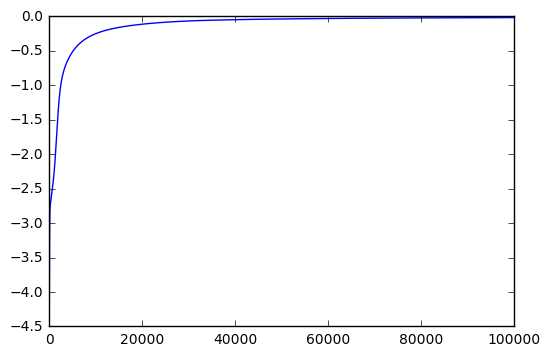

final classication rate 1.0


In [21]:
test_xor()

C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:94: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:95: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:98: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:99: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ll: -1036.739888 classification rate 0.519


C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in exp


ll: -691.238159396 classification rate 0.523
ll: -690.361197087 classification rate 0.524
ll: -689.736556429 classification rate 0.528
ll: -689.412098055 classification rate 0.532
ll: -689.138942878 classification rate 0.537
ll: -688.938798938 classification rate 0.542
ll: -688.816167759 classification rate 0.548
ll: -688.755054519 classification rate 0.549
ll: -688.732854975 classification rate 0.549
ll: -688.728936786 classification rate 0.55
ll: -688.729775876 classification rate 0.55
ll: -688.729372159 classification rate 0.552
ll: -688.726174708 classification rate 0.552
ll: -688.718707801 classification rate 0.553
ll: -688.695407852 classification rate 0.553


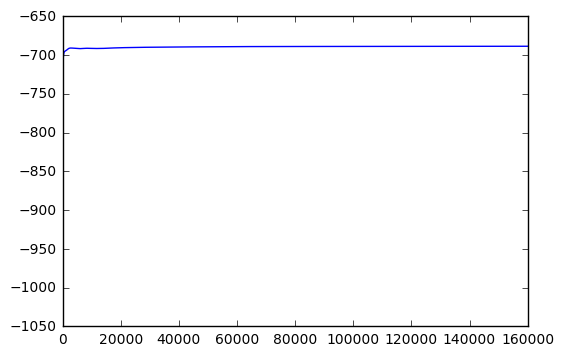

final classication rate 0.551


In [31]:
test_donut()